<a href="https://colab.research.google.com/github/steffiangel/AML/blob/main/2348510_aml_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("/content/Program_1_Dataset - Program_1_Dataset.csv")

In [3]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [4]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [5]:
Dup_Rows = df[df.duplicated()]
Dup_Rows

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue


Text(0.5, 1.0, 'Number of Missing Values')

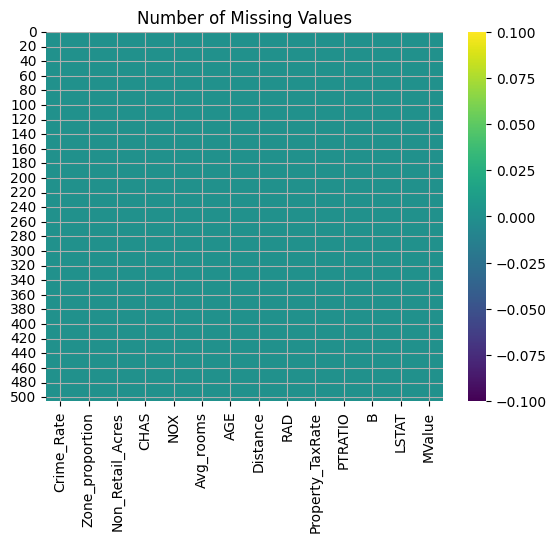

In [6]:

sns.heatmap(df.isnull(),cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


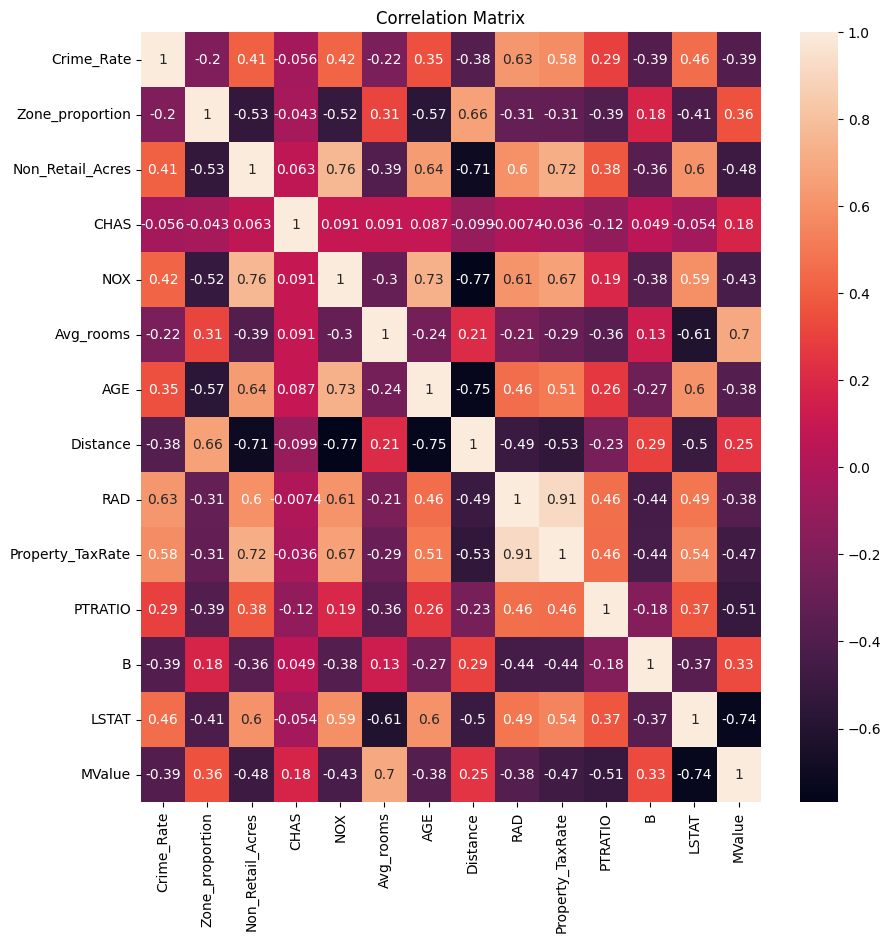

In [9]:
plt.figure(figsize=(10,10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show()

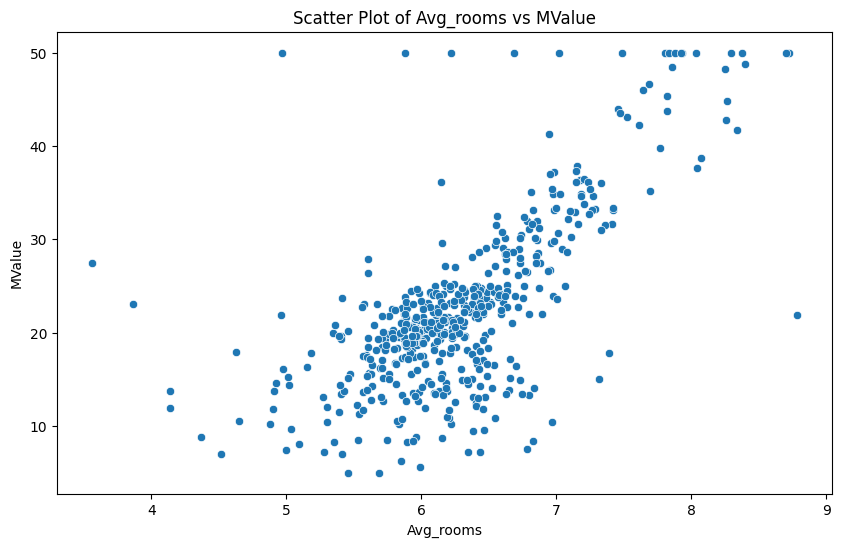

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_rooms', y='MValue', data=df)
plt.title('Scatter Plot of Avg_rooms vs MValue')
plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.show()

In [11]:
X = df[['Avg_rooms']]
Y = df['MValue']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [13]:
mean=df['MValue'].mean()
mean

22.532806324110673

Text(0, 0.5, 'MValue')

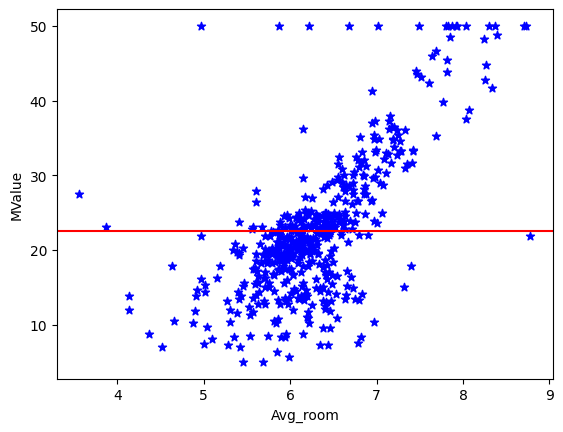

In [14]:
plt.scatter(df['Avg_rooms'],df['MValue'],color='blue',marker='*')
plt.axhline(y=mean,color='red')
plt.annotate('Average repair time',xy=(1,mean+2.5))
plt.xlabel('Avg_room')
plt.ylabel('MValue')

In [15]:
med=df['MValue'].median()
med

21.2

Text(0, 0.5, 'MValue')

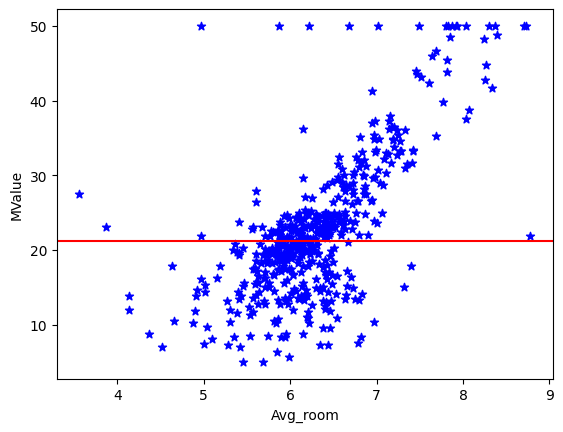

In [16]:
plt.scatter(df['Avg_rooms'],df['MValue'],color='blue',marker='*')
plt.axhline(y=med,color='red')
plt.annotate('Average repair time',xy=(1,mean+2.5))
plt.xlabel('Avg_room')
plt.ylabel('MValue')

In [17]:
x=df.Avg_rooms
y=df.MValue
xy=x*y
n=len(df)
xmean=df.Avg_rooms.mean()
ymean=df.MValue.mean()
numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)
m=numerator/denominator
c=ymean-(m*xmean)
print('intercept -c: ',c," ", 'coefficient -m: ',m)

intercept -c:  -34.67062077643849   coefficient -m:  9.102108981180297


In [18]:
min_best_fit_model=c+m*df.Avg_rooms
df['min_best_fit_model']=min_best_fit_model
df[['Avg_rooms','MValue','min_best_fit_model']]

,Avg_rooms,MValue,min_best_fit_model
0,7.416,33.2,32.830619
1,6.727,27.5,26.559266
2,6.781,26.5,27.050780
3,6.405,18.6,23.628387
4,6.137,19.3,21.189022
...,...,...,...
501,5.854,10.8,18.613125
502,6.459,11.8,24.119901
503,6.341,14.9,23.045852
504,6.251,12.6,22.226662


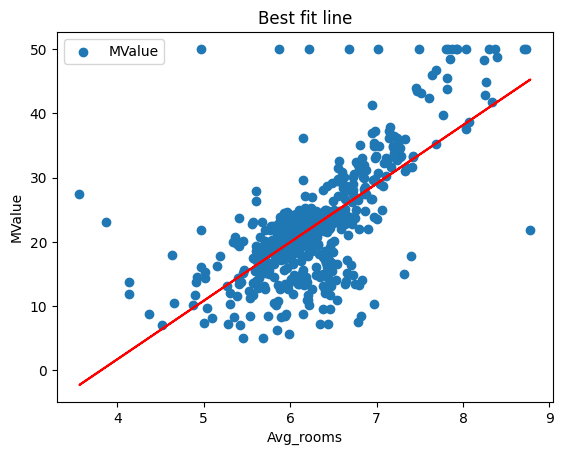

In [19]:
fig, ax=plt.subplots()
ax.scatter(x='Avg_rooms',y='MValue',data=df)
ax.plot(df.Avg_rooms,df.min_best_fit_model,color='red')
ax.set_ylabel('MValue')
ax.set_xlabel("Avg_rooms")
ax.set_title('Best fit line')
ax.legend()

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
coef = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient: {coef:.2f}')
print(f'Intercept: {intercept:.2f}')

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


Coefficient: 8.93
Intercept: -33.51


In [22]:
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Testing Mean Squared Error: {test_mse:.2f}')

print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')

Training Mean Squared Error: 47.81
Testing Mean Squared Error: 33.85
Training R-squared: 0.46
Testing R-squared: 0.54


Linear Regression:  it assumes that the relationship between the dependent variable and the independent variables is linear.  it assumes that a change in one independent variable will result in a proportional change in the dependent variable.
I have tried finding the best fit line using the mean, meadin and by changing the slope and y- intercept.THe model which had varied slope and intercept resulted as a better fit.


The coefficent is 8.93 which mean for each change in x , target variable y increases by 8.93 units.
Training MSE	47.81	Moderate amount of error
Testing MSE	33.85	Low amount of error
Training R-squared	0.46	Moderate amount of explanation
Testing R-squared	0.54	Good amount of explanation.

Hence the model works well on the test data and is good fit.